In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [13]:
# Generating 'fake' data
def gen_data(nobs=1000):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = x_1 + e
    return y, x_1, x_2
y, x_1, x_2 = gen_data(nobs=1000)

In [14]:
# Setup test
def setup_test_params(y, x_1, x_2):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    return ols.params, lasso.params, ridge.params
print(setup_test_params(y, x_1, x_2))

(array([1.00720175, 0.04083204]), array([0.90525129, 0.        ]), array([0.91351882, 0.03829217]))


<ipython-input-16-ba85a2742455>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_xticklabels(['x_1', 'x_2'])


[Text(1.00720175, 0, 'x_1'), Text(0.04083204, 0, 'x_2')]

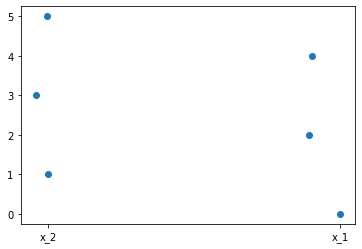

In [16]:
# Scatterplots
"""4. Make a scatter plot with the coefficients, ideally they are similar.
- The x axis should have 2 ticks, x_1 and x_2
- The y axis should plot the estimated coefficient on each variable.
- Also, print the estimated coefficient on x_1
6 data points """
x = [1.00720175, 0.04083204, 0.90525129, 0.        , 0.91351882, 0.03829217]
plt.scatter(x, range(len(x)))
plt.xticks([1.00720175, 0.04083204])
plt.axes().set_xticklabels(['x_1', 'x_2'])

In [42]:
# MSE
def setup_test_mse(y, x_1, x_2):
    X = np.column_stack((x_1, x_2))
    ols = sm.OLS(y, X).fit()
    lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=1.0)
    ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=0.1, L1_wt=0.0)
    ols_mse = np.mean((ols.model.endog-ols.fittedvalues)**2) 
    lasso_mse = np.mean((lasso.model.endog-lasso.fittedvalues)**2)
    ridge_mse = np.mean((ridge.model.endog-ridge.fittedvalues)**2) 
    return ols_mse,lasso_mse,ridge_mse

lst = []
for i in range(1000):
    results = setup_test_mse(y, x_1, x_2)
    lst.append(results)
lst

# lst2 = [setup_test_mse(y, x_1, x_2) for i in range(1000)]
# lst2 

[(1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.0126597537984772),
 (1.0040919164401994, 1.0159175820177904, 1.01265975379

In [43]:
df = pd.DataFrame(lst, columns=['ols_mse', 'lasso_mse', 'ridge_mse'])
df

,ols_mse,lasso_mse,ridge_mse
0,1.004092,1.015918,1.01266
1,1.004092,1.015918,1.01266
2,1.004092,1.015918,1.01266
3,1.004092,1.015918,1.01266
4,1.004092,1.015918,1.01266
...,...,...,...
995,1.004092,1.015918,1.01266
996,1.004092,1.015918,1.01266
997,1.004092,1.015918,1.01266
998,1.004092,1.015918,1.01266


In [44]:
df['diff_ols_lasso'] = df['ols_mse'] - df['lasso_mse']
df['diff_ols_ridge'] = df['ols_mse'] - df['ridge_mse']
df['diff_lasso_ridge'] = df['ridge_mse'] - df['lasso_mse']
df

,ols_mse,lasso_mse,ridge_mse,diff_ols_lasso,diff_ols_ridge,diff_lasso_ridge
0,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
1,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
2,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
3,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
4,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
...,...,...,...,...,...,...
995,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
996,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
997,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258
998,1.004092,1.015918,1.01266,-0.011826,-0.008568,-0.003258


In [45]:
lst_cols = ['diff_ols_lasso','diff_ols_ridge','diff_lasso_ridge']
for i in lst_cols:
    sd = df[i].std()
    df[i] = df[i]/sd * math.sqrt(1000)
    print(sd)
df

1.8223710632176086e-16
1.6835237441153146e-16
0.0


,ols_mse,lasso_mse,ridge_mse,diff_ols_lasso,diff_ols_ridge,diff_lasso_ridge
0,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
1,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
2,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
3,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
4,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
...,...,...,...,...,...,...
995,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
996,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
997,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf
998,1.004092,1.015918,1.01266,-2.052054e+15,-1.609355e+15,-inf


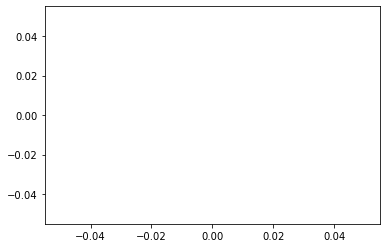

In [50]:
plt.hist(df['diff_ols_lasso'], df['diff_ols_ridge'])
plt.show()